In [1]:
import kornia as K
import torch
import cv2
from kornia.contrib import FaceDetector, FaceDetectorResult, FaceKeypoint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [6]:
def draw_keypoint(img: np.ndarray, det: FaceDetectorResult, kpt_type: FaceKeypoint) -> np.ndarray:
    
    kpt = det.get_keypoint(kpt_type).int().tolist()
    
    return cv2.circle(img, kpt, 2, (255, 0, 0), 2)


def detect(img_raw):

    if img_raw is not None:
        img = K.image_to_tensor(img_raw, keepdim=False)
        img = K.color.bgr_to_rgb(img.float())
        
        face_detection = FaceDetector()

        with torch.no_grad():
            dets = face_detection(img)
        dets = [FaceDetectorResult(o) for o in dets[0]]

        img_vis = img_raw.copy()

        vis_threshold = 0.95
         
        for b in dets:
            if b.score < vis_threshold:
                continue
            
            # Нарисуем bounding box по найденным координатам
            img_vis = cv2.rectangle(img_vis, b.top_left.int().tolist(), b.bottom_right.int().tolist(), (255, 0, 0), 4)
            
            # Нарисуем найденные на лице ключевые точки
            img_vis = draw_keypoint(img_vis, b, FaceKeypoint.EYE_LEFT)
            img_vis = draw_keypoint(img_vis, b, FaceKeypoint.EYE_RIGHT)
            img_vis = draw_keypoint(img_vis, b, FaceKeypoint.NOSE)
            img_vis = draw_keypoint(img_vis, b, FaceKeypoint.MOUTH_LEFT)
            img_vis = draw_keypoint(img_vis, b, FaceKeypoint.MOUTH_RIGHT)
        

        return img_vis

In [7]:
def load_torch_image(file):
    image = K.image_to_tensor(cv2.imread(file), False).float()/255
    image = K.color.bgr_to_rgb(image)
    return image

def image_show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

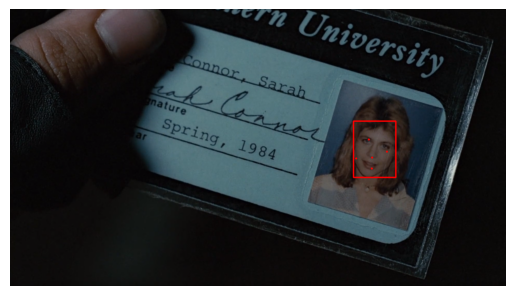

In [8]:
image = np.asarray(Image.open("image1.png"))

img_vis = detect(image)

image_show(img_vis)

In [5]:
im_rgb = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)
cv2.imwrite("out_image2.png", im_rgb) 

True

In [6]:
print(img_vis.shape, type(img_vis))

(1080, 1920, 3) <class 'numpy.ndarray'>
